In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-future-prediction/Employee.csv


# Importing Dependencies 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/employee-future-prediction/Employee.csv')

In [4]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [5]:
df['Education'].value_counts()

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

In [6]:
df['City'].value_counts()

Bangalore    2228
Pune         1268
New Delhi    1157
Name: City, dtype: int64

# Education

In [7]:
out_df=pd.DataFrame(df.groupby('Education')['Education'].count())

out_df


,Education
Education,
Bachelors,3601
Masters,873
PHD,179


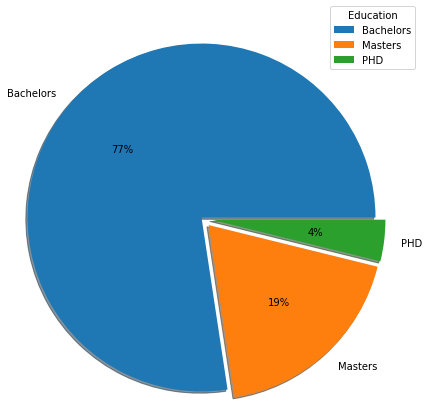

In [8]:
plt.pie(out_df['Education'],labels=['Bachelors','Masters','PHD'],autopct='%.0f%%',radius=2,explode = (0.02,0.1, 0.1),shadow=True)
plt.legend( 
          title ="Education",
         
          bbox_to_anchor =(1, 0.5,0.5, 1))

**Employee who leave company in next 2 years**

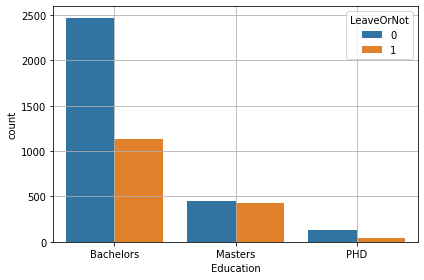

In [9]:
sns.countplot(df['Education'], hue = df['LeaveOrNot'])
plt.tight_layout()
plt.grid(True)
plt.show()

# Joining Year

In [10]:
new_df = pd.DataFrame(df.groupby(['JoiningYear' , 'LeaveOrNot', ])['JoiningYear'].count())
new_df

JoiningYear
JoiningYear LeaveOrNot             
2012        0                   395
            1                   109
2013        0                   445
            1                   224
2014        0                   526
            1                   173
2015        0                   463
            1                   318
2016        0                   408
            1                   117
2017        0                   811
            1                   297
2018        0                     5
            1                   362

**Employee who leave company in next 2 years**

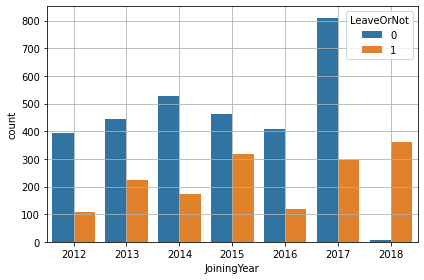

In [11]:
sns.countplot(df['JoiningYear'],hue=df['LeaveOrNot'])
plt.tight_layout()
plt.grid(True)
plt.show()

# City

In [12]:
out_df=pd.DataFrame(df.groupby('City')['City'].count())

out_df

,City
City,
Bangalore,2228
New Delhi,1157
Pune,1268


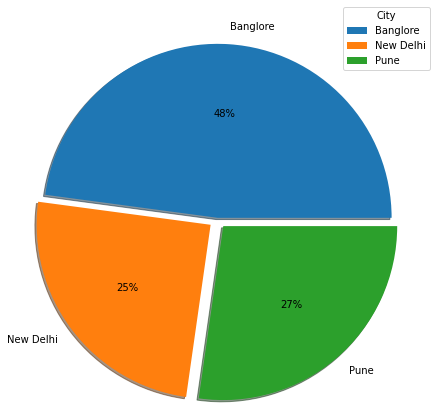

In [13]:
plt.pie(out_df['City'],labels=['Banglore','New Delhi','Pune'],autopct='%.0f%%',radius=2,explode = (0.02,0.1, 0.1),shadow=True)
plt.legend( 
          title ="City",
         
          bbox_to_anchor =(1, 0.5,0.5, 1))

# Age

<Figure size 720x576 with 0 Axes>

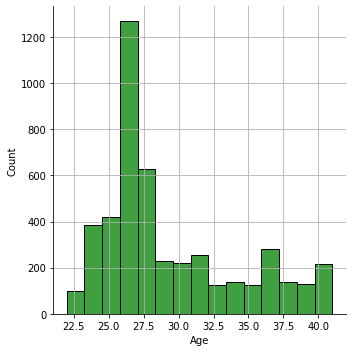

In [14]:
plt.figure(figsize=(10,8))
sns.displot(df['Age'] , color='green', bins=15)
plt.tight_layout()
plt.grid(True)
plt.show()

# Gender

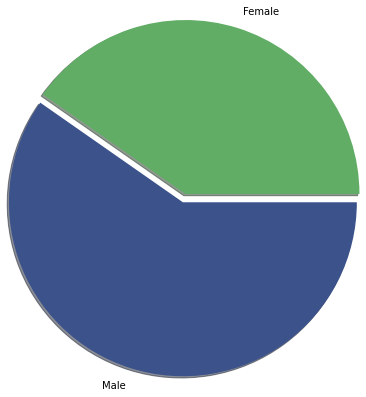

In [15]:
out_df=pd.DataFrame(df.groupby('Gender')['Gender'].count())
colors = ['#61ad66','#3b528b']
plt.pie(out_df['Gender'] , labels = ['Female', 'Male'],colors = colors , radius = 2 ,explode = (0, 0.1), shadow = True)
plt.show()

# Data Preprocessing

In [16]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
feature = ['Education', 'JoiningYear', 'City', 'PaymentTier','Gender', 'EverBenched', 'ExperienceInCurrentDomain']

In [19]:
for col in feature:
    df[col] = le.fit_transform(df[col])

In [20]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,5,0,2,34,1,0,0,0
1,0,1,2,0,28,0,0,3,1
2,0,2,1,2,38,0,0,2,0
3,1,4,0,2,27,1,0,5,1
4,1,5,2,2,24,1,1,2,1


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x = df.drop(['LeaveOrNot' , 'ExperienceInCurrentDomain'] , axis = 1)
y = df.LeaveOrNot

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size = 0.2 , random_state = 12)

# Model Fitting

In [24]:
scores = []
from sklearn.metrics import f1_score

**KNeighbours Classifier**

In [25]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 7 )
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [26]:
pred = model.predict(x_test)
scores.append({
    'model' : 'KNeighborsClassifier',
    'score' :  model.score(x_test,y_test),
'f1_score'  :  f1_score(y_test , pred)
})

model.score(x_test,y_test)

0.8335123523093448

# RandomForest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=35, random_state=42, criterion='entropy')
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=35, random_state=42)

In [28]:
y_predict = model.predict(x_test)

scores.append({
    'model' : 'RandomForestClassifier',
    'score' :  model.score(x_test,y_test),
'f1_score'  :  f1_score(y_test , pred)
})

model.score(x_test,y_test)

0.8571428571428571

# DecisionTree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
 
model = DecisionTreeClassifier( random_state=42, criterion='entropy', splitter='random')
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42, splitter='random')

In [30]:
y_predict = model.predict(x_test)

scores.append({
    'model' : 'DecisionTreeClassifier',
    'score' :  model.score(x_test,y_test),
'f1_score'  :  f1_score(y_test , pred)
})

model.score(x_test,y_test)

0.8571428571428571

# XGBRFClassifier

In [31]:
from xgboost import XGBRFClassifier

model = XGBRFClassifier(eval_metric='mlogloss',
                        random_state=42,
                       learning_rate=0.01,
                       max_depth=10, 
                       scale_pos_weight=1.5)
model.fit(x_train, y_train)

XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, enable_categorical=False,
                eval_metric='mlogloss', gamma=0, gpu_id=-1,
                importance_type=None, interaction_constraints='',
                learning_rate=0.01, max_delta_step=0, max_depth=10,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=4, num_parallel_tree=100,
                objective='binary:logistic', predictor='auto', random_state=42,
                reg_alpha=0, scale_pos_weight=1.5, tree_method='exact',
                validate_parameters=1, verbosity=None)

In [32]:
pred=model.predict(x_test)

scores.append({
        'model': 'XGBRFClassifier',
        'score': model.score(x_test,y_test),
    'f1_score' : f1_score(y_test,pred)
    })


model.score(x_test, y_test)

0.8796992481203008

# Complete Analysis

In [33]:
Score = pd.DataFrame(scores,columns=['model','score','f1_score'])
Score.sort_values('score',ascending=False,inplace=True)
Score

,model,score,f1_score
3,XGBRFClassifier,0.879699,0.797834
1,RandomForestClassifier,0.857143,0.697856
2,DecisionTreeClassifier,0.857143,0.697856
0,KNeighborsClassifier,0.833512,0.697856


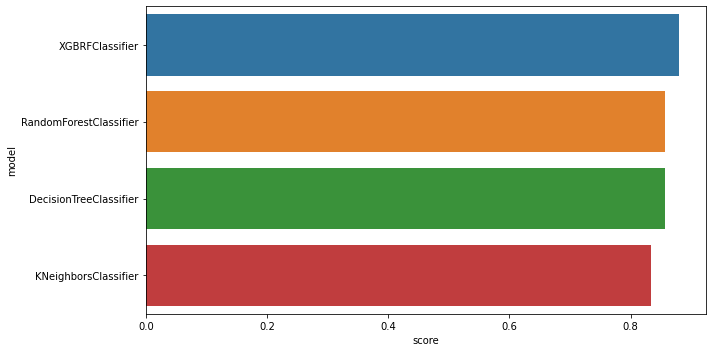

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(y=Score['model'],x=Score['score'])
plt.tight_layout()

plt.show()

**Best Model**

XGBRFClassifier model gives the best accuracy of 0.879% to predict whether the employee will leave the company or not.

# Thank you !!

Please upvote if you liked my work :):)